# Data Loading and EDA

This is the first of several notebooks which will be used as python scripts to complete the Coursera course: How to Win A Data Science Competition. 

In this notebook I will simply be loading the data, modifying it slightly, and performing some simple exploratory analysis to determine best practices for the types of features to add and the types of encoding methods to use. 

## Imports

In [5]:
# Native imports
import time
import sys
import gc
import pickle

# scientific computing imports
import numpy as np
import pandas as pd

# Data processing imports
from itertools import product
from sklearn.preprocessing import LabelEncoder

# Plotting imports
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# model imports
from xgboost import XGBRegressor
from xgboost import plot_importance

# Native imports
import time
import sys
import gc
import pickle

## Load the data

Here we will simply load all of the datasets which are provided to us for the competition

In [3]:
path = '/Users/spencerbertsch/Desktop/Courses/Coursera/Predict-Future-Sales-Kaggle/src/data/'
train = pd.read_csv(str(path + 'sales_train.csv'))
test = pd.read_csv(str(path + 'test.csv')).set_index('ID')
submission = pd.read_csv(str(path + 'sample_submission.csv'))
items = pd.read_csv(str(path + 'items.csv'))
cats = pd.read_csv(str(path + 'item_categories.csv'))
shops = pd.read_csv(str(path + 'shops.csv'))

One idea that I got from [Denis Larinov](https://www.kaggle.com/dlarionov]) was to remove the outliers from the data as a first step. If there are any outliers which truly dont make sense for the dataset provided we can remove those samples or clip their values within a reasonable range. 

In [51]:
def plot_outliers(vec_to_plot1, vec_to_plot2, *args):
    # Two subplots, the axes array is 1-d
    f, axarr = plt.subplots(2, sharex=False)
    axarr[0].boxplot(vec_to_plot1)
    axarr[1].boxplot(vec_to_plot2)
    axarr[0].set_title('Outliers via Simple Boxplot', fontsize=16)
    
    
def remove_outliers():
    print('...healing outliers...')

## Plot outliers using a boxplot

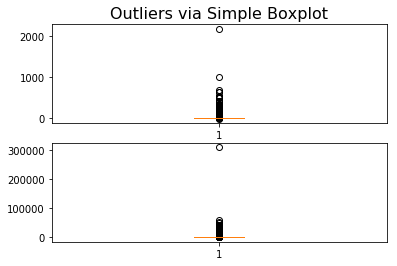

In [52]:
plot_outliers(vec_to_plot1=train.item_cnt_day, vec_to_plot2=train.item_price)

We can now remove these outliers directly

In [55]:
train = train[train.item_price<200000]
train = train[train.item_cnt_day<1000]

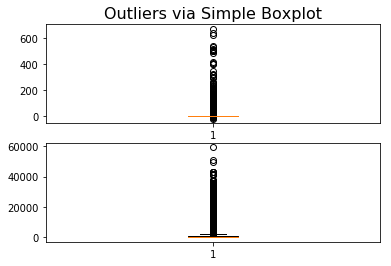

In [56]:
plot_outliers(vec_to_plot1=train.item_cnt_day, vec_to_plot2=train.item_price)

We can still see that there are many outliers according to matplotlib's base parameters which define an outlier, but few which are truly not a part of the distrobution. 

In [ ]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)


### Resources: 

For this notebook I mainly relied on the lectures and the homework exercises from the course. I also consulted the kernels and notebooks from top performers on the competition. Any specific thoughts which were borrowed (both directly and indirectly via code) were cited when used. 